## Comparação Entre Modelos

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns 
from statsmodels.tools.eval_measures import rmse
import warnings
from shutil import copy2
%matplotlib inline

# Matplotlib options
rcParams['figure.figsize'] = (10, 8)
rcParams['axes.grid'] = False
plt.style.use('seaborn-deep')

# Pandas setup
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000) 
pd.set_option('display.max_colwidth', -1) 
warnings.filterwarnings('ignore')

In [2]:
path = './models/forecasts/dataframe'
entities = ['p1', 'p2']
words = [
  'COLIFORMES_TERMOTOLERANTES', 
  'DQO', 
  'FÓSFORO', 
  'NITROGÊNIO', 
  'DBO', 
  'PH', 
  'SURFACTANTES', 
  'SÓLIDOS', 
  'ÓLEOS', 
  'COR_VERDADEIRA'
]

In [3]:
entity = entities[0]
word = words[3]

validation = pd.read_csv('./datasets/' + entity + "_validation.csv", encoding='utf8', parse_dates=True, index_col="DATE")
true_values = validation[word]
forecasts = pd.read_csv(f'{path}/{entity}_{word}.csv', index_col='DATE', parse_dates=True)
forecasts['TRUE_VALUES'] = true_values
arima = forecasts['ARIMA']
ets = forecasts['ETS']
prophet = forecasts['PROPHET']

In [9]:
copy2("comparison.ipynb", f"./comparison_review/{entity}/{word}.ipynb")

'./comparison_review/p1/NITROGÊNIO.ipynb'

In [5]:
score = pd.DataFrame({
    "RMSE": [
        rmse(arima, true_values),
        rmse(ets, true_values),
        rmse(prophet, true_values)
    ]
}, index=["arima", "ets", "prophet"])
score = score.sort_values("RMSE")
score

,RMSE
ets,7.536553
arima,8.804306
prophet,10.415199


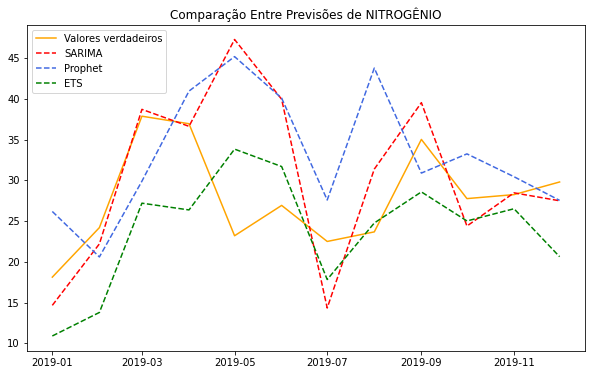

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(true_values, color="orange", label="Valores verdadeiros")
plt.plot(arima, color="red", linestyle="--", label="SARIMA")
plt.plot(prophet, color="royalblue", linestyle="--", label="Prophet")
plt.plot(ets, color="green", linestyle="--", label="ETS")
plt.title(f"Comparação Entre Previsões de {word}")
plt.legend(loc="upper left");

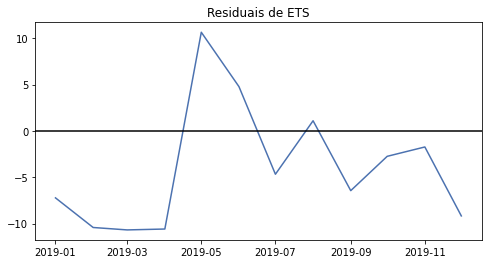

In [7]:
best_fit_name = score.index[0]
residuals =  eval(best_fit_name) - true_values
plt.figure(figsize=(8, 4))
plt.plot(residuals)
plt.axhline(0, color="black")
plt.title(f"Residuais de {best_fit_name.upper()}");

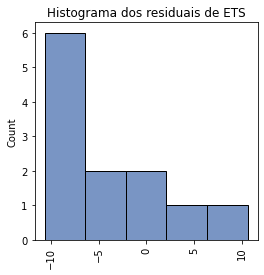

In [8]:
plt.figure(figsize=(4, 4))
plt.xticks(rotation=90)
plt.xlabel("")
plt.title(f"Histograma dos residuais de {best_fit_name.upper()}")
sns.histplot(residuals);